<a href="https://colab.research.google.com/github/DimaKav/python-marketing-projects/blob/master/Data_Science_for_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Descriptive Analysis - Visualizing KPIs

Dataset description: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/DimaKav/python-marketing-projects/master/bank-full.csv', sep=';')

In [0]:
df.shape

(45211, 17)

In [0]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


y - has the client subscribed a term deposit? (binary: 'yes','no')

In [0]:
# Encode the y
labels, uniques = pd.factorize(df['y'])
df['conversion'] = labels

In [0]:
# Aggregate conversion rate: overall performance of our marketing campaign

print('total conversions: %i out of %i' % (df.conversion.sum(), df.shape[0]))
print('conversion rate: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100.0))

total conversions: 5289 out of 45211
conversion rate: 11.70%


Let's dive deeper and break the customer base into multiple segments by age and compute KPIs for individual segments.

In [0]:
conversions_by_age = df.groupby(
    by='age'
)['conversion'].sum() / df.groupby(
    by='age'
)['conversion'].count() * 100.0

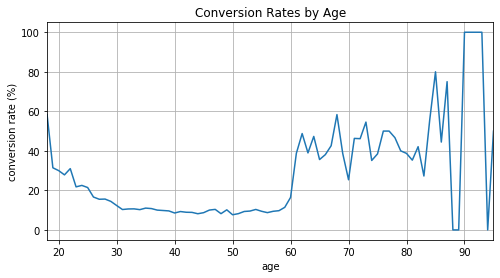

In [0]:
ax = conversions_by_age.plot(
    grid=True,
    figsize=(8, 4),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

There aren't many clients who are 80 or older so that data is noisy on the chart. To reduce the noise, we can group multiple ages together.

In [0]:
df['age_group'] = df['age'].apply(
    lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
        else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
        else '[60, 70)' if x < 70 else '70+'
)

In [0]:
conversions_by_age_group = df.groupby(
    by='age_group'
)['conversion'].sum() / df.groupby(
    by='age_group'
)['conversion'].count() * 100.0

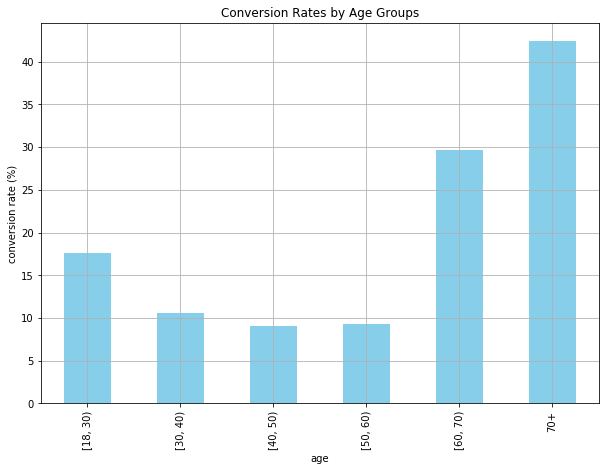

In [0]:
ax = conversions_by_age_group.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

Let's look at the demographic differences between the converted clients and the non-converted clients.

In [0]:
conversions_by_marital_status_df = pd.pivot_table(df, values='y', 
                                               index='marital', 
                                               columns='conversion', 
                                               aggfunc=len)

In [0]:
conversions_by_marital_status_df.rename(columns={0: 'non-conversion'}, inplace=True)
conversions_by_marital_status_df.rename(columns={1: 'conversion'}, inplace=True)

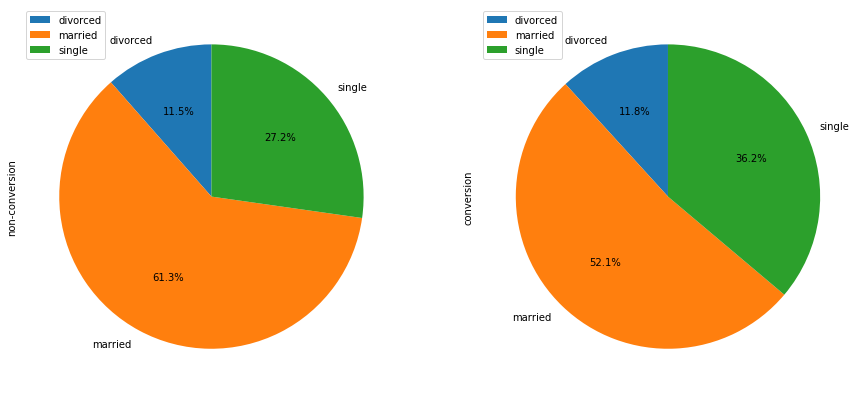

In [0]:
conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

Let's look at conversions by age and marital status.

In [0]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)

age_marital_df = age_marital_df.divide(
    df.groupby(
        by='age_group'
    )['conversion'].count(),
    axis=0
)

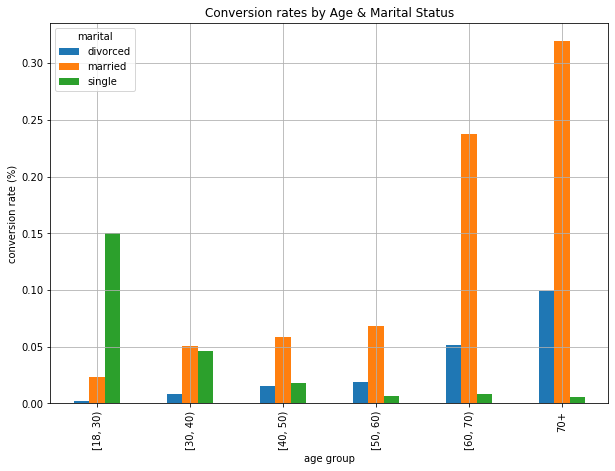

In [0]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

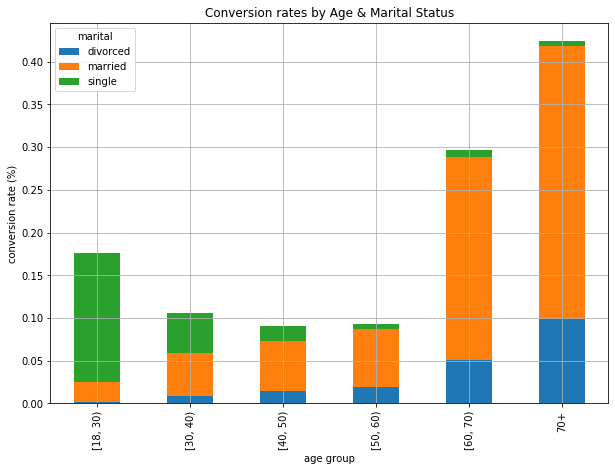

In [0]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    stacked=True,
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

# Explanatory Analysis - Regression & Customer Engagement 

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/DimaKav/python-marketing-projects/master/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [6]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
df.shape

(9134, 24)